In [13]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

all_data = pd.read_csv('total_data.csv')
all_data = all_data[all_data['Experiment']=='Exp1']
all_data = all_data[all_data['Transect_Num']==1]
all_data = all_data.drop(columns=['Unnamed: 0','TransDate','Test_name','Transect', 'Distance','Transect_Num', 'Height','Experiment','Dist_Travelled', 'Transect_Dist', 'Peak_Dist'])
all_data

,Date_Time,gps.lat,gps.lon,altitudeRelative,Concentration,Time_Elapsed
0,2021-03-15 15:14:09,-18.851859,147.718454,14.4,286.732816,1
1,2021-03-15 15:14:09,-18.851859,147.718454,14.4,237.105414,2
2,2021-03-15 15:14:09,-18.851859,147.718454,14.4,226.279577,3
3,2021-03-15 15:14:09,-18.851859,147.718454,14.4,235.301059,4
4,2021-03-15 15:14:09,-18.851859,147.718454,14.4,246.127481,5
...,...,...,...,...,...,...
396,2021-03-15 15:15:28,-18.849894,147.719016,11.2,233.696604,397
397,2021-03-15 15:15:28,-18.849894,147.719016,11.2,266.080406,398
398,2021-03-15 15:15:28,-18.849893,147.719016,11.2,242.691475,399
399,2021-03-15 15:15:28,-18.849893,147.719016,11.2,244.490507,400


MovieWriter ffmpeg unavailable; using Pillow instead.


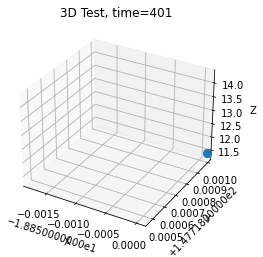

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation

def update_graph(num):
    data=all_data[all_data['Time_Elapsed']==num]
    graph._offsets3d = (data['gps.lat'], data['gps.lon'], data['altitudeRelative'])
    graph.set_sizes(data['Concentration']/4)
    title.set_text('3D Test, time={}'.format(num))
    return graph

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# Setting the axes properties
ax.set_xlim3d([np.min(all_data['gps.lat']), np.max(all_data['gps.lat'])])
ax.set_xlabel('X')

ax.set_ylim3d([np.min(all_data['gps.lon']), np.max(all_data['gps.lon'])])
ax.set_ylabel('Y')

ax.set_zlim3d([np.min(all_data['altitudeRelative']), np.max(all_data['altitudeRelative'])])
ax.set_zlabel('Z')

title = ax.set_title('3D Test')

data= all_data[all_data['Time_Elapsed']==1]
graph = ax.scatter(data['gps.lat'], data['gps.lon'], data['altitudeRelative'],s=data['Concentration']/4)

ani = animation.FuncAnimation(fig, update_graph, range(1,np.max(all_data['Time_Elapsed'])+1), 
                               interval=40, blit=False)
ani.save('raw_data_exp_1.gif')